In [61]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [62]:
from helpers import load_data

# load dataset
x, y = load_data()

In [63]:
def build_k_indices(y, k_fold, seed):
    num_rows = y.shape[0]
    interval = int(num_rows / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_rows)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [64]:
from costs import compute_mse, compute_rmse
from ridge_regression import ridge_regression, compute_error_vector, compute_mse
from build_polynomial import build_polynomial

def cross_validation(y, x, k_indices, k, lambda_, degree):
    y_test = y[k_indices[k]]
    y_training = np.delete(y, k_indices[k])
    x_test = x[k_indices[k]]
    x_training = np.delete(x, k_indices[k], axis= 0)
    augmented_x_test = build_poly(x_test, degree)
    augmented_x_training = build_polynomial(x_training, degree)
    w, loss_training = ridge_regression(y_training, augmented_x_training, lambda_)
    loss_test = compute_mse(compute_error_vector(y_test, augmented_x_test, w))
    rmse_training = compute_rmse(loss_training)
    rmse_test = compute_rmse(loss_test)
    return rmse_training, rmse_test

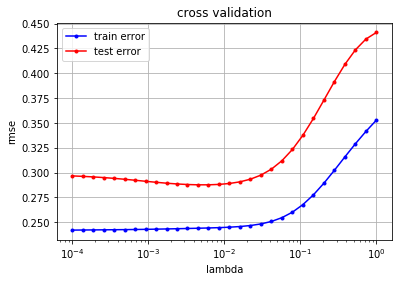

In [65]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    k_indices = build_k_indices(y, k_fold, seed)
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        rmse_tr.append(0)
        rmse_te.append(0)
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr[-1] += loss_tr
            rmse_te[-1] += loss_te
        rmse_tr[-1] /= k_fold
        rmse_te[-1] /= k_fold
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

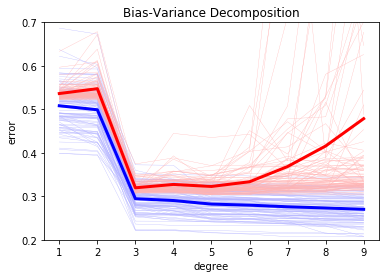

In [66]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from costs import compute_mse, compute_rmse, compute_error_vector

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        x_training, y_training, x_test, y_test = split_data(x, y, ratio_train, seed)
        for index_degree, degree in enumerate(degrees):
            augmented_x_training = build_polynomial(x_training, degree) 
            augmented_x_test = build_polynomial(x_test, degree)
            w, loss_training = least_squares(y_training, augmented_x_training)
            #w, loss_training = ridge_regression(y_training, augmented_x_training, 0.05)
            loss_test = compute_mse(compute_error_vector(y_test, augmented_x_test, w))
            rmse_tr[index_seed, index_degree] = compute_rmse(loss_training)
            rmse_te[index_seed, index_degree] = compute_rmse(loss_test)
            
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()